# B8IT08_CA
# Module Title: B8IT108 Data and Web Mining
### Module Code: B8IT108
### Module Leader: Ehtisham Yasin
### Assessment Title: Develop a product release pipeline

### Student Name: Nicholas Godwin Udomboso
### Student Number: 10547333
### Date: 05/05/2021 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('ad.data', skipinitialspace = True)

C:\Users\ideyl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset.head()

,125,125.1,1.0,1,0,0.1,0.2,0.3,0.4,0.5,...,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540,ad.
0,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [4]:
# replacing the character ‘?’ with nan as the data is unknown
dataset.iloc[:,:4]=dataset.iloc[:,:4].replace("?",np.nan)

## Performing data exploration

In [5]:
#below shows 2820 records of nonad and 458 records of ad.
#this means that the classes of the data is unbalanced in the dataset
dataset['ad.'].value_counts() 

nonad.    2820
ad.        458
Name: ad., dtype: int64

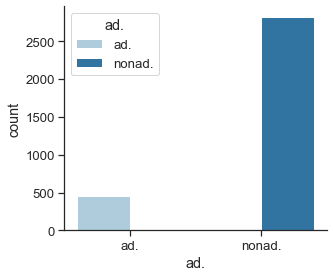

In [6]:
#The figure below shows the graphical representation of the unbalanced dataset.
import seaborn as sns

cols = ['ad.']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, j in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=dataset, x=j, hue='ad.', palette='Paired')
    
sns.despine()

In [7]:
#the dataset has 3278 records
dataset.shape
# len(dataset)

(3278, 1559)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Columns: 1559 entries, 125 to ad.
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [9]:
#to check for nulls in the dataset
#the output shows that the dataset contains null values
dataset.isnull().sum()

125       903
125.1     901
1.0       910
1          15
0           0
         ... 
0.1537      0
0.1538      0
0.1539      0
0.1540      0
ad.         0
Length: 1559, dtype: int64

In [10]:
# to check percentage of missing values in the dataset
print("Percentage of missing values in the dataset columns :" ,
      round((sum(dataset.isna().sum()))/ len(dataset)*100,2))

Percentage of missing values in the dataset columns : 83.25


In [11]:
#the below puts the independent variables in X and the dependent variable in y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)

[['57' '468' '8.2105' ... 0 0 0]
 ['33' '230' '6.9696' ... 0 0 0]
 ['60' '468' '7.8' ... 0 0 0]
 ...
 ['23' '120' '5.2173' ... 0 0 0]
 [nan nan nan ... 0 0 0]
 ['40' '40' '1.0' ... 0 0 0]]


## Preprocessing the dataset

In [13]:
#imputing the missing data with KNNImputer class
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.NaN,n_neighbors=5)
X=imputer.fit_transform(X)

In [14]:
print(X)

[[ 57.     468.       8.2105 ...   0.       0.       0.    ]
 [ 33.     230.       6.9696 ...   0.       0.       0.    ]
 [ 60.     468.       7.8    ...   0.       0.       0.    ]
 ...
 [ 23.     120.       5.2173 ...   0.       0.       0.    ]
 [158.6    222.8      1.2221 ...   0.       0.       0.    ]
 [ 40.      40.       1.     ...   0.       0.       0.    ]]


In [15]:
print(y)

['ad.' 'ad.' 'ad.' ... 'nonad.' 'nonad.' 'nonad.']


## Encoding categorical data

### LabelEncoder

In [16]:
## to represent the values of the dependent variable with numeric data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = LabelEncoder().fit_transform(y)
print(y)

# 0 for ad.
# 1 for nonad.

[0 0 0 ... 1 1 1]


## Feature reduction

In [17]:
##Feature selection with Univariate Selection

## I uncomment this code when I want to reduce the features of the dataset
## otherwise the code is commented to model the algorithms with all features of the dataset 
## to experiment with different number of features I change the value of k in the code to evaluate the number of features
## that will produce best performance
## the default value is 10, meaning the method should select top 10 features for the model and evaluate the performance

# from pandas import read_csv
# from numpy import set_printoptions
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# names = dataset.columns
# #dataframe = read_csv(url, names=names)
# # array = dataset.values
# # feature extraction
# test = SelectKBest(score_func=f_classif, k=10)
# fit = test.fit(X, y)
# # summarize scores
# set_printoptions(precision=3)
# print(fit.scores_)
# features = fit.transform(X)
# X=features
# # summarize selected features
# print(features[0:5,:])

## Random Undersampling

In [ ]:
pip install imblearn

In [18]:
# # this code uses random undersampling to balance the class distribution
# # I uncomment this code when I want to undersample the data for data balancing

# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler
# # summarize class distribution
# print(Counter(y))
# # define undersample strategy
# #undersample = RandomUnderSampler(sampling_strategy='majority')
# undersample = RandomUnderSampler(sampling_strategy=0.5)
# # fit and apply the transform
# X, y = undersample.fit_resample(X, y)
# # summarize class distribution
# print(Counter(y))

## Oversampling with SMOTE

Counter({1: 2820, 0: 458})
Counter({0: 2820, 1: 2820})


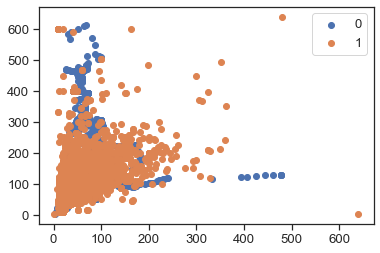

In [20]:
## this code is for oversample method with SMOTE and to plot imbalanced/balanced dataset with SMOTE

## the code is not commented as I implemented the algorithms with data balanced using oversample method

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution after smote
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Training set

In [22]:
##Training the K-NN model on the Training set
## I uncomment this code when I want to implement K-NN algorithm on the dataset, while I comment out other algorithms

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

In [ ]:
##Training the SVM model on the Training set
## this code is not commented as this is the algorithm (SVM) that produced best performance on the dataset

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# ##Training the Kernel SVM model on the Training set
## I uncomment this code when I want to implement Kernel SVM algorithm on the dataset, while I comment out other algorithms

# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

In [ ]:
# ##Training the Naive Bayes model on the Training set
## I uncomment this code when I want to implement Naive Bayes algorithm on the dataset, while I comment out other algorithms

# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

In [ ]:
# ##Training the Decision Tree model on the Training set
## I uncomment this code when I want to implement Decision Tree algorithm on the dataset, while I comment out other algorithms

# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

In [ ]:
# ##Training the Random Forest Classification model on the Training set
## I uncomment this code when I want to implement Random Forest algorithm on the dataset, while I comment out other algorithms

# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

In [ ]:
# ##Training XGBoost on the Training set
## I uncomment this code when I want to implement XGBoost algorithm on the dataset, while I comment out other algorithms

# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
print(y_pred)

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

References:

1. Waqas et al. (2016) Journal of Computer Science & Systems Biology., ‘Treatment of Missing Values in Data Mining’.

2. Brown et al. (2003) Industrial Management & Data Systems., ‘Data Mining and the impact of missing data’.

3. Analytics Vidya. ‘Overcoming Class Imbalance using SMOTE Techniques. Available at: https://www.analyticsvidhya.com/blog/2020/10 overcoming-class-imbalance-using-smote-techniques/ (Accessed 1 May 2021).

4. Brownlee, J. ‘SMOTE for Imbalanced Classification with Python’. Available at: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification (Accessed 1 May 2021).

5. Brownlee, J. (2019) ‘How to Perform Feature Selection with Categorical Data’. Available at: https://machinelearningmastery.com/feature-selection-with-categorical-data/ (Accessed 3 May 2021).

6. Brownlee, J. (2016) ‘Feature Selection for Machine Learning in Python’. Available at: https://machinelearningmastery.com/feature-selection-machine-learning-python/ (Accessed 3 May 2021).

7. Scikit-learn.org. API Reference. Available at: https://scikit-learn.org/stable/modules/classes.html (Accessed 29 April 2021).

8. Aliyev, V. (2016) ‘3 underrated strategies to deal with Missing Values’. Available at: https://towardsdatascience.com/3-underrated-strategies-to-deal-with-missing-values-a539fb6c0690 (Accessed 1 May 2021).

9. Kaushik. (2020) ‘KNNImputer: A robust way to impute missing values (using Scikit-Learn). Available at: https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/ (Accessed 3 May 2021).

10. Amazon ‘How XGBoost Works’. Available at: https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html (Accessed 3 May 2021).

11. Schott, M. (2019) ‘K-Nearest Neighbors (KNN) Algorithm for Machine Learning’. Available at: https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26 (Accessed 3 May 2021).

12. Ray, S. (2017) Analytics Vidhya. ‘K-Nearest Neighbors (KNN) Algorithm for Machine Learning’. Available at:  Understanding Support Vector Machine(SVM) algorithm from examples/ (Accessed 3 May 2021).

13. Chauhan, N. (2020) KDNuggets. ‘Naïve Bayes Algorithm: Everything you need to know’. Available at: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html (Accessed 3 May 2021).

14. Gupta, P. (2017) ‘Decision Trees in Machine Learning’. Available at: https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052 (Accessed 3 May 2021).

15. Analytics Vidhya. (2020) ‘Lets Open the Black Box of Random Forests’. Available at: https://www.analyticsvidhya.com/blog/2020/12/lets-open-the-black-box-of-random-forests/ (Accessed 3 May 2021).

16. Narkhede, S. (2018) ‘Understanding Confusion Matrix’. Available at: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 (Accessed 3 May 2021).

17. Narkhede, S. (2018) ‘Understanding AUC - ROC Curve. Available at: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 (Accessed 3 May 2021).
